<h1 align=center> Análisis Exploratorio de Datos </h1>

---

En este notebook procedemos a analizar los dataset que fueron fragmentados anteriormente en el archivo [intro.ipynb](intro.ipynb).

Para comenzar hay que importar las librerías con las que se trabajará y se realizará el análisis.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import datetime
import warnings
warnings.filterwarnings("ignore")

<h3 align=left>
¿De qué se trata este Análisis?
</h3>

<p>
Este análisis se trata de los datos que nos brinda la Ciudad de Buenos Aires respecto a la información que ellos recopilaron durante los años 2016 a 2021, sobre los sinietros viales que tuvieron lugar en este territorio.
</p>

Se puede tener acceso a los datasets que brinda el gobierno de la Ciudad de Buenos Aires a través de su [página oficial](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales).


<p align=center><img src="./data/assets/R.png" height=100><img src="./data/assets/3-siniestros-viales.jpg" height=160></p>

<h2 align=center>¿Qué clase de contenido podremos encontrar en este análisis?</h2>

<p>En este análisis podremos encontrar los siguientes segmentos:</p>
<ul>
  <li><a href="#valores-nulos">Valores Nulos o Faltantes</a></li>
  <li><a href="#outliers">Valores Atípicos u 'Outliers'</a></li>
  <li><a href="#graphics">Análisis de datos</a></li>
  <li><a href="#KPI">KPI's</a></li>
</ul>

Como primera medida, y antes de poder analizar los archivos con la información, hay que abrirlos. Por eso utilizaremos la librería ```pandas```.

In [66]:
incidentes = pd.read_csv("./data/Incidente.csv")
localizacion = pd.read_csv("./data/Localizacion.csv")
victimas = pd.read_csv("./data/Victimas.csv")
tabla_calles = pd.read_csv("./data/tipo_Calle.csv")
tabla_acusados = pd.read_csv("./data/Type_Acusados.csv")
tabla_victimas = pd.read_csv("./data/Type_Victimas.csv")

<h3 id="valores-nulos" align=center> 
<em>
Valores Faltantes o Nulos 
</em>
</h3>

Iniciaremos viendo la cantidad de nulos de los dataset de la siguiente manera:

||Columna|Columna2|Columna3|
|:-:|:------:|:------:|:-:|
|**Cantidad de nulos**|5|0|1|

Primero, con el dataset de incidentes.

In [3]:
pd.DataFrame(dict(incidentes.isna().sum()), index=['Cantidad de nulos'])

,ID,N_VICTIMAS,FECHA,HORA,PARTICIPANTES,VICTIMA,ACUSADO
Cantidad de nulos,0,0,0,0,0,0,0


Wow! El dataset de incidentes no contiene valores nulos. No le falta ningún dato a ninguna columna.

A continuación, seguimos con el dataset de la localización.

In [4]:
pd.DataFrame(dict(localizacion.isna().sum()), index= ["Cantidad de nulos"])

,ID,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y
Cantidad de nulos,0,0,0,0,0,0,0,0,0,1,567,171,8,0,0,0,0


Bueno... Al parecer este dataset tiene falta de valores en algunas de sus columnas. Esto puede deberse a distintos factores, pero una de la razones podría deberse a que en ocasiones, los sinietros viales ocurren en un cruce de calle de la ciudad y en otra ocasiones ocurre en el medio de una cuadra, lo que podría producir la falta de datos en las columnas de `Altura` y `Cruce`.

Podemos verificar que esta es la razón sumando la cantidad de los datos que hay en ambas columna y comparando con la longitud total de sinietros registrados. Si las cantidades son idénticas significa que la falta de un dato en una columna es completado con el valor del dato que está en la otra columna:

In [5]:
print(f"La suma de los valores es: {dict(localizacion.notna().sum())['Altura'] + dict(localizacion.notna().sum())['Cruce']}")
print(f"La longitud del dateset es: {localizacion.shape[0]}")

La suma de los valores es: 654
La longitud del dateset es: 696


Como nos indican los cálculos, existe una diferencia entre la cantidad de datos reales que hay en ambas columna y la longitud del dataset. Es decir, habrá filas en el dataset que no contendrán un valor asociado a la altura o al cruce donde sucedió ese sinietro, específicamente.

Pasemos al dataset de las víctimas.

In [6]:
pd.DataFrame(dict(victimas.isna().sum()), index= ["Cantidad de nulos"])

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
Cantidad de nulos,0,0,0,0,0,0,0,0,0,0


Este dataset tampoco contiene valores nulos.

<p align=right>Aclaración: <em>Los dataset que nombramos como "tablas_..." son referencia de los valores que están en las tablas que ya analizamos.</em> </p>

Por ejemplo: tabla_calles
|ID_Calle   |Calificación|Descripción|
|:---------:|:----------:|:---------:|
|0|AVENIDA|Arteria cuya calzada tiene...|
|1|GRAL PAZ| Avenida Gral. Paz, ambos sentidos...|
|...|...|...|

---

<h2 id="outliers" align= center>
<em>
Valores atípicos u 'Outliers'
</em> </h2>

En este segmento, cabe aclarar, no se puede hacer un análisis de valores atípicos a cada columna o a todas las tablas, ya que no todas las columnas contiene variables numéricas o, simplemente, su análisis no aportaría nada relevante; como por ejemplo el análisis de datos atípicos a las alturas de las calles sería inutil y no aportearía información importante.

Comencemos analizando la tabla de *incidentes*, especialmente, en la columna del número de víctimas.

PD: `La anchura del gráfico nos indica la densidad de la distribución.`

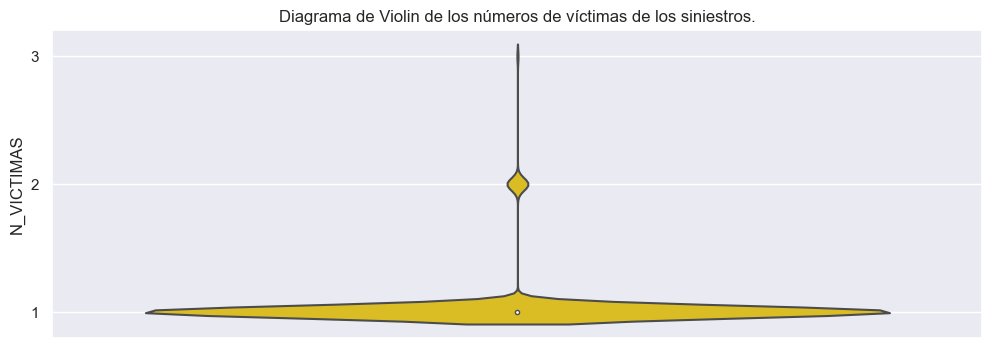

In [7]:
plt.figure(figsize=(12, 4))
sns.violinplot(y= incidentes['N_VICTIMAS'], color="#f8d107")

plt.yticks([1, 2, 3])
plt.title("Diagrama de Violin de los números de víctimas de los siniestros.")

plt.show()

In [21]:
incidentes['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

Como nos muestra el diagrama, la mayoría de accidentes viales tienen solamente una víctima. En una muy pequeña cantidad, suceden sinietros donde están involucradas dos víctimas. Y en una sola ocasión ocurrió un sinietro con tres víctimas.

Ahora veamos como se distribuye los sinistros según el tipo de calle donde pasó:

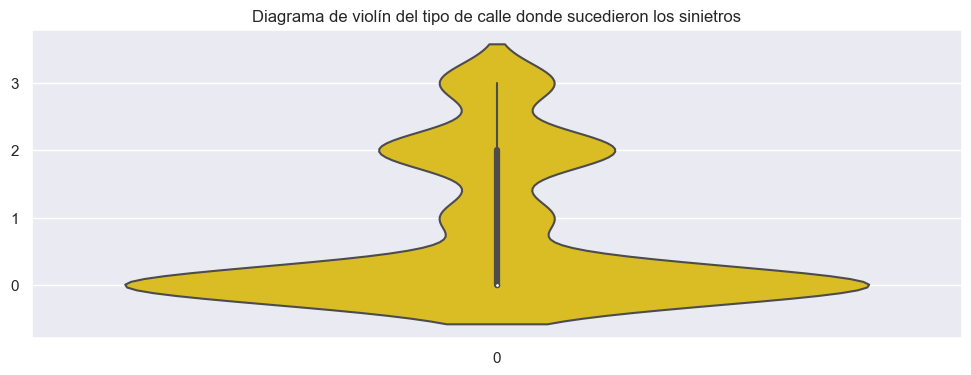

In [9]:
plt.figure(figsize=(12,4))

sns.violinplot(localizacion['TIPO_DE_CALLE'], color="#f8d107")

plt.yticks([0,1,2,3])
plt.title("Diagrama de violín del tipo de calle donde sucedieron los sinietros")
plt.show()

Veamos la tabla de los diferentes tipos de calles.

In [10]:
tabla_calles

,ID_calle,Calificacion,Descripcion
0,0,AVENIDA,Arteria cuya calzada tiene un ancho total de p...
1,1,GRAL PAZ,"Avenida General Paz, ambos sentidos. Incluye i..."
2,2,CALLE,Arteria cuya calzada tiene un ancho conprendid...
3,3,AUTOPISTA,Via multicarril con calzadas para ambas manos ...


In [11]:
localizacion['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
0    429
2    136
3     66
1     65
Name: count, dtype: int64

Si hacemos la comparación con la tabla, podemos ver que la mayoria de los siniestros ocurrieron en avenidas y calles. En cantidades menores también sucedieron algunos accidentes en autopistas y en la Gral. Paz.

---

<h3 id="graphics" align= center>
<em>
Análisis de los datos, con gráficos.
</em></h3>

Veamos ahora la cantidad de víctimas que hubo por año en la Ciudad de Buenos Aires.

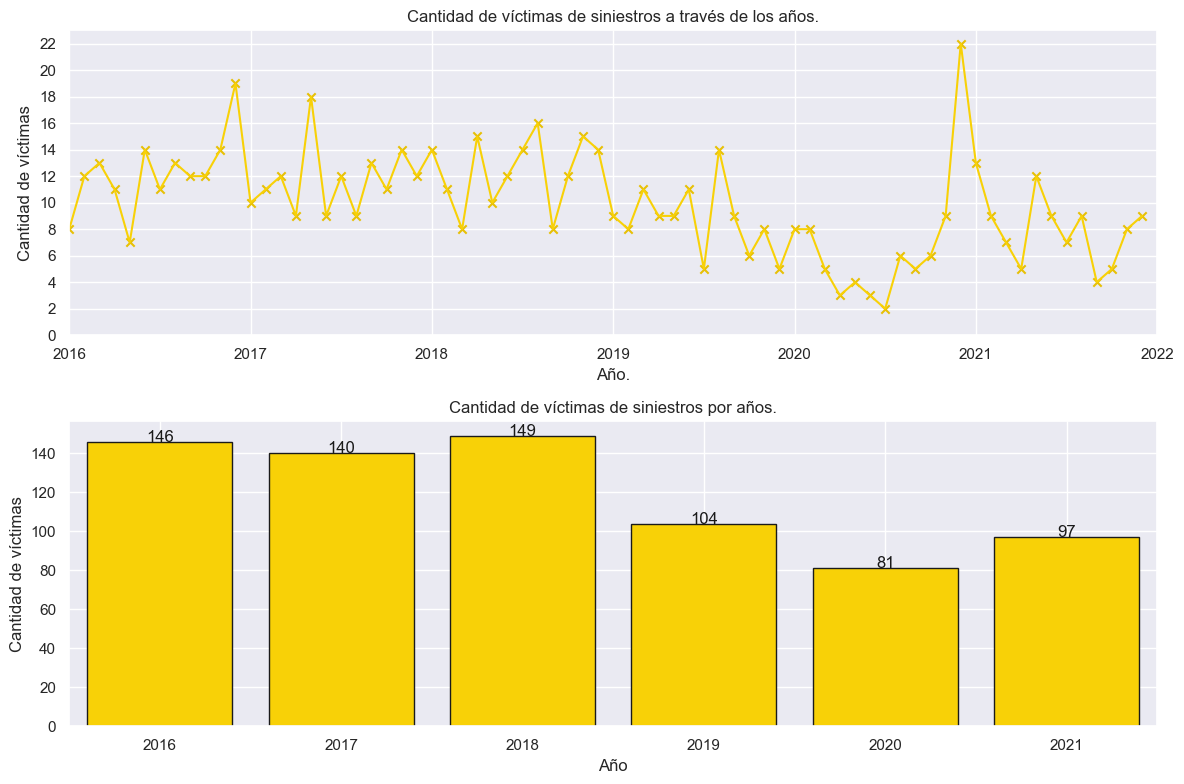

In [12]:
merge = incidentes.merge(localizacion, how= 'inner', left_on='ID', right_on="ID")

# Definimos un diccionario que tendrá los años y la cantidad de víctimas:
dict_ano_mes = {}
dict_ano = {}
for anio, mes, n_vict in merge[['AAAA', 'MM','N_VICTIMAS']].values:
    dict_ano_mes[f"{int(anio)}"] = {}

for anio, mes, n_vict in merge[['AAAA', 'MM', 'N_VICTIMAS']].values:
    dict_ano_mes[F"{int(anio)}"][f"{mes}"] = 0
    dict_ano[f"{anio}"] = 0

for anio, mes, n_vict in merge[['AAAA', 'MM', 'N_VICTIMAS']].values:
    dict_ano_mes[F"{int(anio)}"][f"{mes}"] += n_vict
    dict_ano[f"{anio}"] += n_vict

final = {}
for key in dict_ano_mes.keys():
    final[f"{key}"] = {}
    for month in dict_ano_mes[f"{key}"].keys():
        final[f"{key}"][f"{(int(month) - 1)  / 12}"] = dict_ano_mes[f"{key}"][f"{month}"]

final2 = {}
for k in final.keys():
    for z in final[f"{k}"]:
        final2[f"{int(k) + float(z)}"] = final[f"{k}"][f"{z}"]

values_x = [float(x) for x in final2.keys()]
values_y = list(final2.values())

fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0].plot(values_x, values_y, color= '#f8d107')
ax[0].scatter(values_x, values_y, color= '#e7c006', marker='x')

ax[0].set_yticks(np.linspace(0,22,12))
ax[0].set_title("Cantidad de víctimas de siniestros a través de los años.")
ax[0].set_xlabel("Año.")
ax[0].set_ylabel("Cantidad de víctimas")
ax[0].set_xlim(2016,2022)

for k, v in dict_ano.items():
    ax[1].bar(int(k), v, color= '#f8d107', edgecolor='k')
    ax[1].text(int(k), v, str(v), color= 'k', ha='center', va='baseline')

ax[1].set_title("Cantidad de víctimas de siniestros por años.")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Cantidad de víctimas")
ax[1].set_xlim(2015.5, 2021.5)

plt.tight_layout()
plt.show()

In [13]:
100 - (dict_ano['2019'] * 100 / dict_ano['2016'])

28.76712328767124

El gráfico nos muestra una realidad bastante obvia: la pandemia de **Co-Vid-19** tuvo incidencia en la disminución abrupta de víctimas en el año 2020. Pero un año después, cuando se normaliza un poco más el transito de vehículos la tasa de víctimas de siniestro viales volvió a aumentar.

Aunque podemos afirmar, que las políticas viales tuvieron éxito. Ya que, desde el 2016 al 2019, la cantidad de víctimas disminuyó **28,8%**; de 146 a 104. Como último dato, en 2021, disminuyó a 97 víctimas.

<p id="comunas" align= left>¿Cómo estuvieron las comunas?</p>
<p><em> Veamos los siguientes gráficos: </em></p>

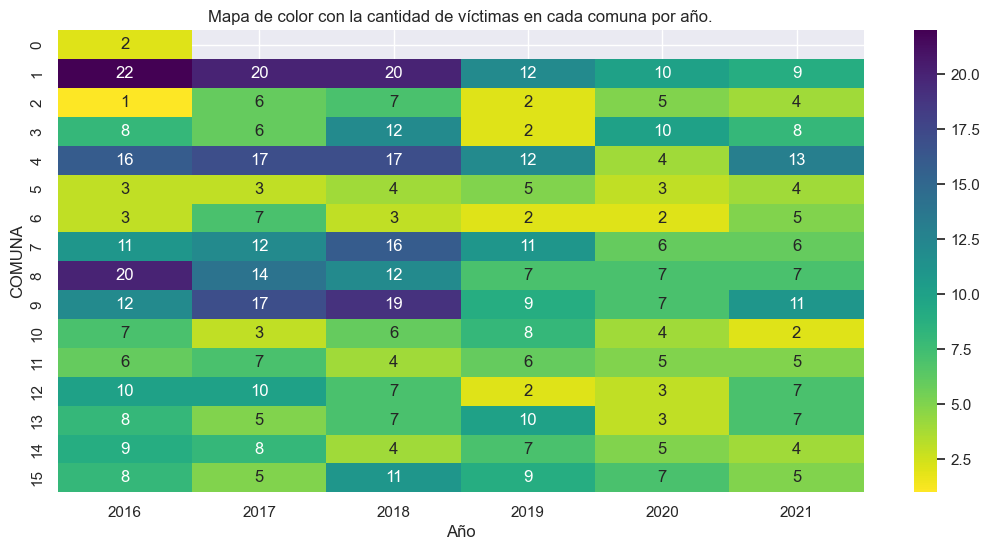

In [14]:
pivot = merge.groupby(['AAAA','COMUNA']).agg({'N_VICTIMAS':'sum'})
pivot = pivot.reset_index()
pivot = pivot.pivot_table(values='N_VICTIMAS', index='COMUNA', columns='AAAA')

plt.figure(figsize=(13,6))
sns.heatmap(pivot, cmap= 'viridis_r', annot= True, fmt= '.0f', cbar= True)


plt.title("Mapa de color con la cantidad de víctimas en cada comuna por año.")
plt.xlabel("Año")
plt.show()

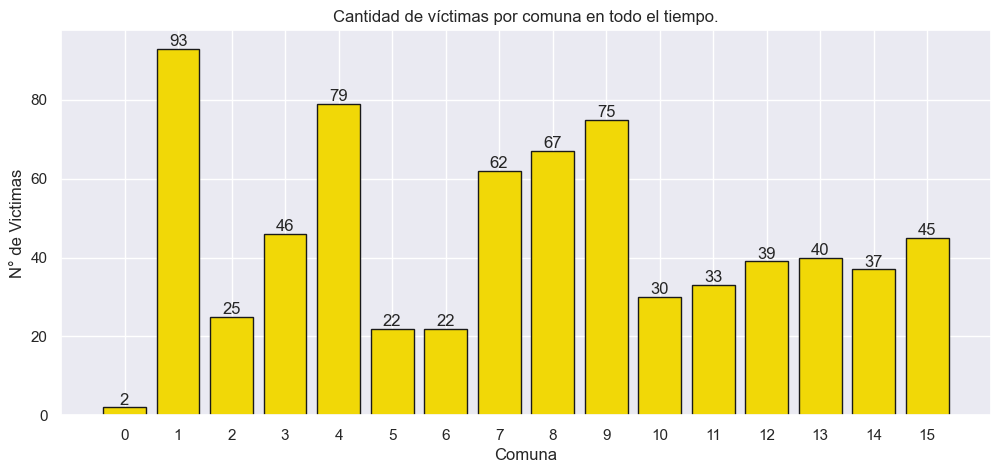

In [15]:
comunas = merge.groupby("COMUNA").agg({'N_VICTIMAS':"sum"})
comunas.reset_index(inplace= True)

plt.figure(figsize=(12,5))
plt.bar(comunas['COMUNA'].values, comunas["N_VICTIMAS"].values, color='#f1d807', edgecolor="k")

for x, y in comunas[['COMUNA',"N_VICTIMAS"]].values:
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.title("Cantidad de víctimas por comuna en todo el tiempo.")
plt.xticks(comunas['COMUNA'].values)
plt.xlabel("Comuna")
plt.ylabel("N° de Victimas")

plt.show()

Como nos muestran ambos gráficos, las comunas tuvieron diferentes cantidades de víctimas por los accidentes. Las comunas que más víctimas tuvieron fueron las comunas 1 y 4. El resto de comunas también tuvieron sus respectivas cantidades, pero no en la medida de las comuna 1 y 4.

<p> ¿Cómo eran las víctimas? Porque hasta ahora hemos hablado de ellas como solamente números, profundicemos es la edad que tenían, su sexo o que estaban haciendo cuando tuvieron el accidente.</p>

In [18]:
genero = victimas.groupby("SEXO").agg({"VICTIMA":"count"})
genero.reset_index(inplace=True)
genero['SEXO'].values

array(['FEMENINO', 'MASCULINO', 'SD'], dtype=object)

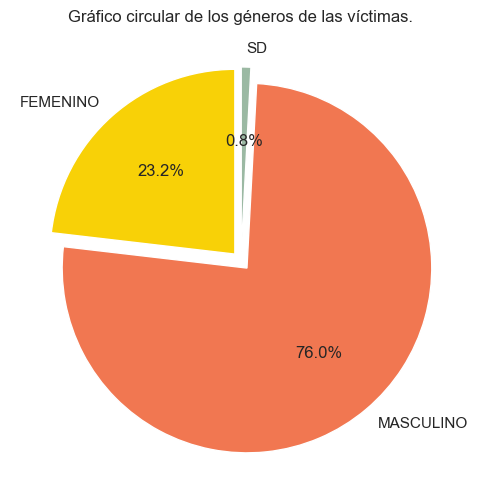

In [19]:
plt.figure(figsize=(8,6))
plt.pie(x= genero['VICTIMA'].values, labels= genero['SEXO'].values, explode=(0.05, 0.05, 0.05), autopct="%1.1f%%", startangle=90, colors=["#F8d107", "#f17751", "#9bb9a3"])

plt.title("Gráfico circular de los géneros de las víctimas.")
plt.show()

<p>El <strong>76% de las víctimas</strong> son de género masculino. El <strong>23,2% de la víctimas</strong> son de género femenino. Y solamente el <strong>0.8% de las víctimas</strong> no tiene información sobre su sexo. </p>

Las personas de género masculino tienen más probabilidad de tener accidentes viales. Casi tres veces más de posibilidad que las personas de género femenino.

Cuando uno piensa en cuando podría tener un accidente, podría pensar que sería posible cuando sea mayor. Por eso nos preguntamos: ¿Qué edades tenían las víctimas?

In [30]:
edades = [int(x) for x in victimas['EDAD'] if x != "SD"]

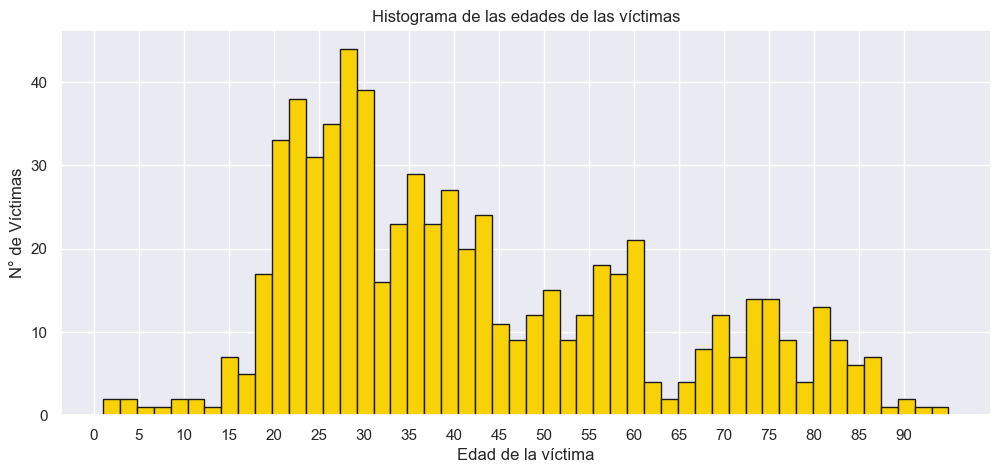

In [35]:
plt.figure(figsize=(12, 5))
plt.hist(x= edades, bins= 50, color="#f8d107", edgecolor= 'k')

plt.title("Histograma de las edades de las víctimas")
plt.xlabel("Edad de la víctima")
plt.ylabel("N° de Víctimas")
plt.xticks(np.arange(0, 95, 5))
plt.show()

Lamentablemente, las víctimas de estos accidentes fueron niños, adultos y personas ancianas. En esto no podemos decir que le pasa solamente a un grupo de gente de _x_ edad. Un accidente podría ocurrir a cualquiera.

Pero, en la Ciudad de Buenos Aires, los casos registrados nos indican que durante este periodo de cinco años, las personas de entre **20** y **30** años fueron las que más sinistros viales tuvieron.

Bien. Las víctimas de estos terribles accidentes pueden distinguirse en edad, pero veamos ahora que hacía cada persona al momento del accidente.

In [44]:
roles = victimas.groupby("ROL").agg({"ID_hecho": "count"}).reset_index()
roles.sort_values("ID_hecho", ascending= False, inplace= True)

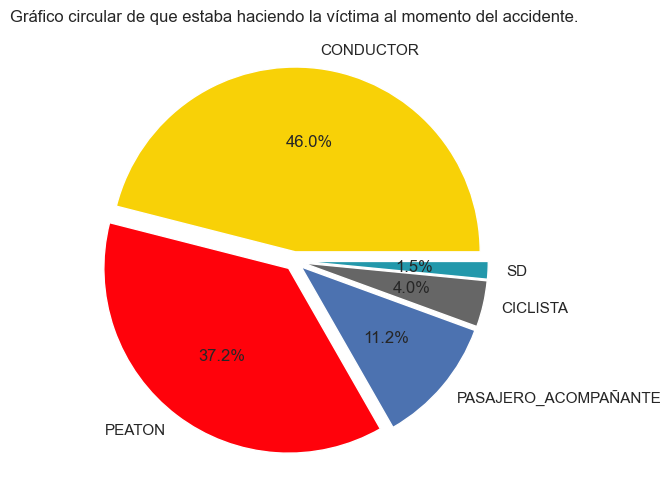

In [47]:
plt.figure(figsize= (12,6))

plt.pie(x= roles["ID_hecho"].values, labels= roles["ROL"].values, explode=(0.05, 0.05, 0.05, 0.05, 0.05), autopct= "%1.1f%%", colors= ['#f8d107', '#ff020b', 'b', '#666666' ,'#2398ab'])

plt.title("Gráfico circular de que estaba haciendo la víctima al momento del accidente.")

plt.show()

Las personas que sufrieron los accidentes eran 46% conductores del vehículo accidentado, 37.2% eran peatones que tuvieron la mala suerte de estar en el lugar y momento equivocados, el 11.2% fueron personas que estaban dentro del vehículo y no lo conducían; el 4% eran ciclistas que no tuvieron la mejor suerte y fueron parte de estos accidentes. Luego, hay un 1.5% del que no se tiene información de que estaba haciendo al momento de sufrir el accidente.

---



¿En qué horarios suelen ocurrir los accidentes?

In [87]:
lista_horas = [int(i) for i in localizacion["HH"] if i != "SD"]

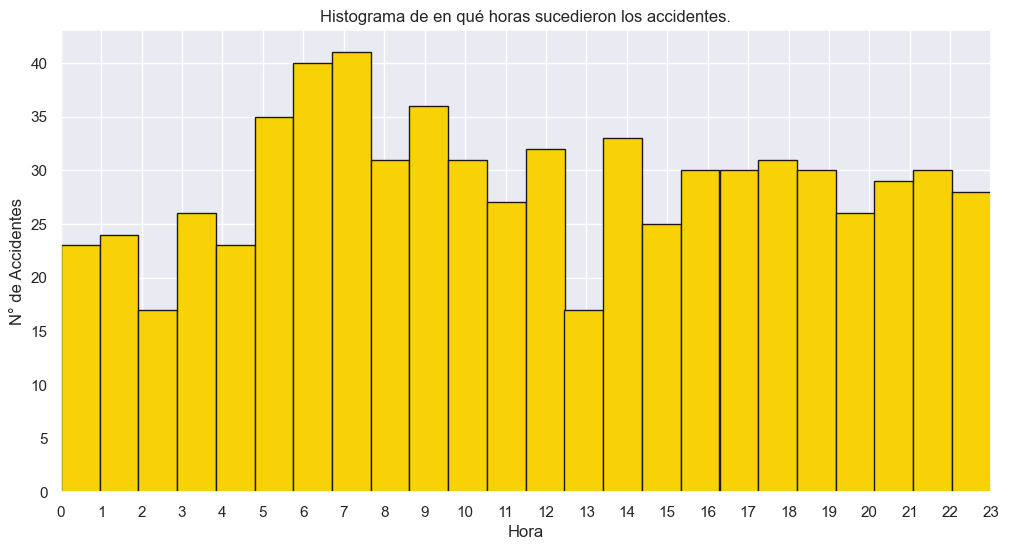

In [91]:
plt.figure(figsize=(12, 6))

plt.hist(lista_horas, bins= 24, color= "#f8d107", edgecolor= 'k')

plt.xticks(np.arange(0, 24, 1))
plt.title("Histograma de en qué horas sucedieron los accidentes.")
plt.xlabel("Hora")
plt.ylabel("N° de Accidentes")
plt.xlim(0,23)

plt.show()

El histograma nos muestra que el horario no tiene una incidencia real en la distribucón de los accidentes.

---

<h3 id="KPI" align=center>
<em>KPI's</em>
</h3>

<p>En la constante búsqueda de mejorar la calidad de vida de las personas, y en este caso su seguridad, el gobierno de la Ciudad de Buenos Aires debería tomar en cuenta todo el análisis que hacemos en este y plantearse que políticas viales debería implementar. </p>

<p> De este manera, en esta sección plantearemos dos KPI's (Indicadores claves de Rendimiento) que el gobierno de la Ciudad de Buenos Aires podría considerar. </p>

<li>Disminución de un 20% de la tasa de siniestros totales en las comunas 1, 4, 8 y 9 en un lapso de cinco años.</li>

Como analizamos en este documento las <a href="#comunas">comunas</a> 1, 4, 8 y 9 son las que, en el lapso analizado, tuvieron más victimas. Por eso planteamos la disminución de la tasa de sinistros en estas comunas en un 20%.
Cabe aclarar que algunas comunas, como la comuna 1, tuvieron una disminución en la cantidad de siniestro y víctimas. En estos casos, planteamos que el gobierno intente mantener esos niveles menores, y de ser posible que disminuyan aún más de lo que ya  han hecho.

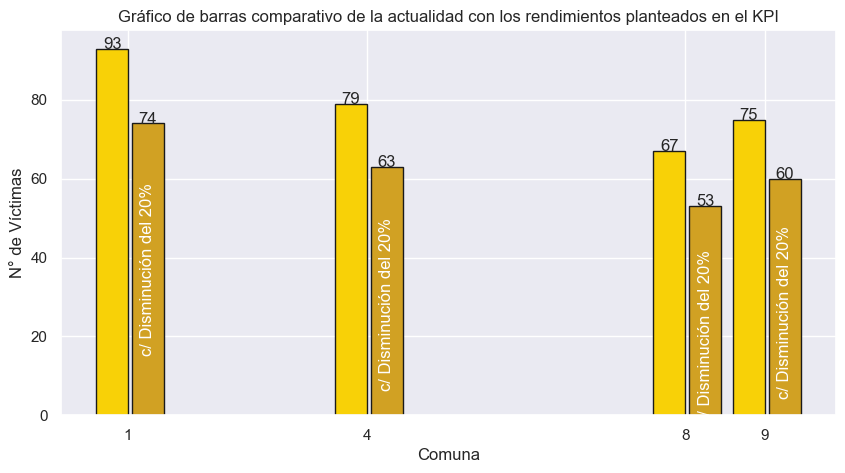

In [175]:
kpi1 = comunas[comunas['COMUNA'].isin([1, 4, 8, 9])]

kpi1["c/ -20%"] = kpi1["N_VICTIMAS"].apply(lambda x: int(80 * x / 100))

plt.figure(figsize=(10, 5))

for c, actual, pred in kpi1.values:
    plt.bar(x= c - 0.2, height= actual, width= 0.4, color= "#f8d107", edgecolor= 'k')
    plt.bar(x= c + 0.25, height= pred, width= 0.4, color="#d1a123", edgecolor='k')
    plt.text(c + 0.25, pred, str(pred), ha= "center")
    plt.text(c + 0.25, pred // 1.25, str("c/ Disminución del 20%"), ha= "center", va= 'top', color='w', rotation= 90)
    plt.text(c - 0.2, actual, str(actual), ha= "center")

plt.title("Gráfico de barras comparativo de la actualidad con los rendimientos planteados en el KPI")
plt.xticks([1, 4, 8, 9])
plt.xlabel("Comuna")
plt.ylabel("N° de Víctimas")

plt.show()

<li>Disminución del 15% de los accidentes contra peatones en un año</li>

Los peatones ocupan el 37.2% del total de víctimas. Este número es bastante alto, tomando en consideración que en la mayoría de los casos los peatones no estaban involucrados en la escena y fueron víctimas secundarias de los accidentes. Por eso planteamos la disminución de la cantidad de accidentes contra peatones en un año. La protección al ciudadano que está de a pie debe aumentar para poder conseguir este objetivo.

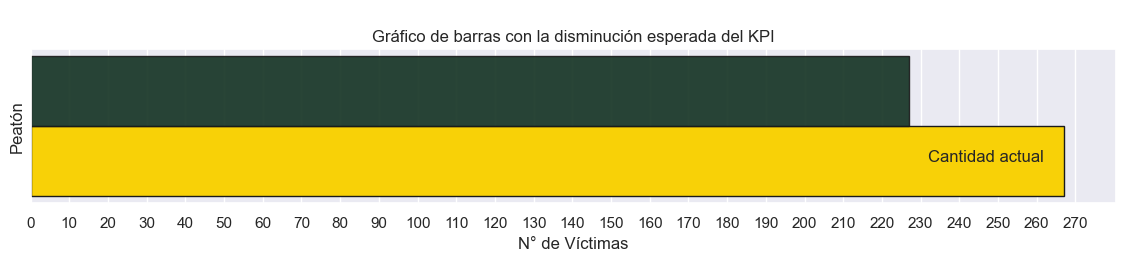

In [193]:
kpi2 = roles[roles["ROL"]=="PEATON"]
kpi2["c/ -15%"] = round(85 * roles["ID_hecho"] / 100, 0)

plt.figure(figsize=(14,2))

plt.barh(0, kpi2["ID_hecho"], height= 0.2, color= "#f8d107", edgecolor='k')
plt.barh(0.2, kpi2["c/ -15%"], height= 0.2, color= "#123121", edgecolor= 'k', alpha= 0.9)

plt.text(232,0, "Cantidad actual")
plt.text(111, 0.4, "c/ Disminución del 15%", color= 'w')

plt.title("Gráfico de barras con la disminución esperada del KPI")
plt.xlabel("N° de Víctimas")
plt.yticks([])
plt.ylabel("Peatón")
plt.xticks(np.arange(0, 280, 10))
plt.show()

---
<h1 align=center> ^^^ </h1>

---